# Lab Assignment 5

Complete the following steps by **filling in your answer in the Code or Text cell below each question**, and then **run the cell** to observe the output..

Before you start working on the lab, please do the following steps:
- Go to the Settings (gear icon) in the upper right, on the left of the blue "Share" button.
- Click on the gear icon.
- At the pop up menu, click on "AI Assistance"
- Uncheck all 3 boxes, if they're not already unchecked.
- Click "Close".

This setting will let you do your own work instead of having the AI do all the work.

For the questions below:
- If the question has no reference to a class notes Colab notebook, then the question is a review of previous material.
- If the question refers to Module 5 class notes, then it's new material for Module 5 and the specific section should be helpful as you work on the answer.

---

In this lab we will work with simulation and calculating probabilities with dice rolls. We'll experiment with 1 die first, then with 2 dice. A die has 6 sides, each side is marked with a certain number of dots (or pips), ranging from 1 to 6.

First we run the Code cell below to **import the necessary Python modules**.

In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

---

## Question 1 - Simulation of 1 Die Roll

We use a simulation to find the _observed probability_ of rolling a die and getting a 6. Then we check the observed probability against the _theoretical probability_, which is the mathematically derived probability.

1a. First we establish the theoretical probability of getting a 6 from a die roll.

Based on Module 5 class notes, "Finding Probabilities" section, we learn what the theoretical probability is for getting a 6 when rolling a die. In the Text box below, **enter the theoretical probability**.

The probability of getting a 6 in a die roll is:  1/6

1b. Now we work on creating a simulation to check the theoretical probability above.

Based on Module 5 class notes, "Iterations" section, in the Code cell below **write the function `die_roll_simulation`**, which is a simulation of rolling a die a certain number of times.

`die_roll_simulation` does the following steps:
- Accept as input: the number of times to roll the die, and store this number in the variable `number_of_times`.
- Create a list `L` to store the outcome of each die roll.
- Loop `number_of_times` and in the loop:
> - Call `random.randint` to get a random number between 1-6, which represents the result of the die roll.
> - Store the random number in the list `L`
- When the loop is done running `number_of_times`, convert `L` into a numpy array so we can use numpy for efficient calculations.
- Return the numpy array.

Then **run the Code cell** to let Python know about the `die_roll_simulation` function.


In [15]:
# function die_roll_simulation
# define the function, give it parameters
def die_roll_simulation(number_of_times):
    L = []
    for _ in range(int(number_of_times)):
        r = random.randint(1, 6)  # why: inclusive 1..6 matches die faces
        L.append(r)
    return np.array(L, dtype=int)

1c. We now simulate rolling a die 1000 times to see how many times we get a 6.

In the Code cell below, **write code to do the following steps**:
- Call the `die_roll_simulation` function and pass in 1000 as the `number_of_times`, and save the returned array with the variable name `outcomes`.
- Print the number of values in `outcomes` to check that it's 1000 values.

In [3]:
# 1c — simulate 1000 rolls and check the count
outcomes = die_roll_simulation(1000)
print(len(outcomes))

1000


1d. We find the probability of getting a 6 by using the following formula:
$$ P(6) = \frac{\text{number of 6}}{1000} $$

In the Code cell below, **add code to do the following steps**:
- Find the number of 6 in `outcomes`: based on Module 5 class notes, "Comparison Expressions" section, use a numpy function to count the number of nonzeros when comparing `outcomes` with 6.
- Divide this number by 1000 and store the result with the varible name `P_6`, for P(6).
- Print `P_6`, rounded to 3 digits after the decimal point.

Then for comparison purpose, **add code to print the theoretical probability** (in step 1a) as a decimal number, rounded to 3 digits after the decimal point

In [4]:
# 1d — estimate P(6) from the simulated outcomes
count_sixes = np.count_nonzero(outcomes == 6)
P_6 = count_sixes / outcomes.size

print(f"Observed P(6): {P_6:.3f}")
print(f"Theoretical P(6): {(1/6):.3f}")

Observed P(6): 0.184
Theoretical P(6): 0.167


1e. The simulated result seems pretty close to the theoretical probability. But we need to run the simulation above many times to see whether the simulated result is still close to the theoretical probability.

In the Code cell below, **write code to run the simulation 2000 times**:
- Create a list named `L`.
- Write a loop that runs 2000 times. In the loop:
> - From step 1c: use the line of code to create `outcomes`
> - From step 1d: use the line of code to create `P_6`
> - Store `P_6` in the list `L`
- When the loop is finished, convert `L` to an array named `observed_P`, for observed probability.

Then write code to **print the number of values in `L`**. There should be 2000 values, each value represents the observed P(6) for one iteration.

In [5]:
# 1e — run the simulation 2000 times and store observed P(6) each time

L = []
for _ in range(2000):
    outcomes = die_roll_simulation(1000)
    P_6 = np.count_nonzero(outcomes == 6) / outcomes.size
    L.append(P_6)
observed_P = np.array(L, dtype=float)
print(len(L))

2000


1f. Now that we have 2000 observed probabilities from running the simulation 2000 times, we use data visualization to see how close the 2000 observed probabilities are to the theoretical probability that you showed in step 1a.

In the Code cell below, **add code to create a histogram of `observed_P`** and run the Code cell.

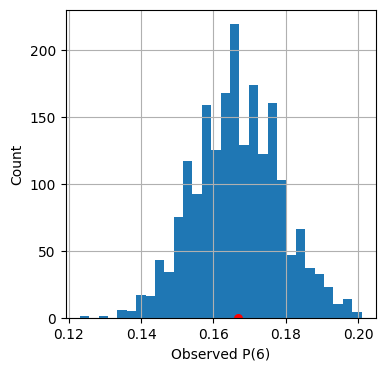

In [6]:
plt.figure(figsize=(4,4))
plt.hist(observed_P, bins=30)
plt.xlabel('Observed P(6)')
plt.ylabel('Count')
plt.scatter(1/6, 0, color='red', s=30)
plt.grid()
plt.show()

We can see that out of 2000 runs of the simulation, the observed probability of getting a 6 has the highest chance of being around the value where the red dot is, which is the theoretical probability.

---

## Question 2 - Simulation with 2 Dice

We use a simulation to find the observed probability of rolling 2 dice and getting a 12 as the total from the 2 dice. Then we check the observed probability against the theoretical probability.

2a. First we establish the theoretical probability of getting a total of 12 from rolling 2 dice.

Getting a 12 total means that the first roll needs to be a 6 _and_ the second roll needs to be a 6 also.

Based on Module 5 class notes, "Finding Probabilities" section, we learn what the theoretical probability is for getting an outcome when 2 events are ANDed together. In the Text box below, **enter the theoretical probability, and show your work on how you arrived at this probability**.

The probability of getting a total of 12 from rolling 2 dice is: 1/6 * 1/6 = 1/36

2b. Now we work on creating a simulation to check the theoretical probability above.

Based on Module 5 class notes, "Iterations" section, in the Code cell below **write the function `dice_roll_simulation`**, which is a simulation of rolling 2 dice a certain number of times.

`dice_roll_simulation` does the following steps:
- Accept as input: the number of times to roll the 2 dice, and store this number in the variable `number_of_times`.
- Create a list `L` to store the outcome of each dice roll.
- Loop `num_of_times` and in the loop:
> - Create a variable named `total` and set it to 0.
> - For the first die roll: call `random.randint` to get a random number between 1-6, and add this number to `total`.
> - Repeat the step above for the 2nd die roll: call `random.randint` to get a random number between 1-6, and add this number to `total`.
> - Store the `total` in the list `L`.
- When the loop is done running `num_of_times`, converts `L` into a numpy array.
- Return the numpy array.

Then **run the Code cell** to let Python know about the `dice_roll_simulation` function.


In [7]:
def dice_roll_simulation(number_of_times):
    L = []
    for _ in range(int(number_of_times)):
        total = 0
        total += random.randint(1, 6)
        total += random.randint(1, 6)
        L.append(total)
    return np.array(L, dtype=int)


2c. We now simulate rolling 2 dice 1000 times to see how many 12 we get.

In the Code cell below, **write code to do the following steps**:
- Call the `dice_roll_simulation` function and pass in 1000 as the `number_of_times`, and save the returned array with the variable name `outcomes`.
- Print the number of values in `outcomes` to check that it's 1000 values.

In [8]:
outcomes = dice_roll_simulation(1000)
print(len(outcomes))


1000


2d. We find the probability of getting a total of 12 by using the following formula:
$$ P(12) = \frac{\text{number of 12}}{1000} $$

In the Code cell below, **add code to do the following steps**:
- Find the number of 12 in `outcomes`: based on Module 5 class notes, "Comparison Expressions" section, use a numpy function to count the number of nonzeros when comparing `outcomes` with 12.
- Divide the number by 1000 and store the result with the varible name `P_12`, for P(12).
- Print `P_12`, rounded to 3 digits after the decimal point.

Then for comparison purpose, **add code to print the theoretical probability** (in step 2a) as a decimal number, rounded to 3 digits after the decimal point

In [9]:
P_12 = np.count_nonzero(outcomes == 12) / 1000
print("Observed P(12):", round(P_12, 3))
print("Theoretical P(12):", round(1/36, 3))

Observed P(12): 0.035
Theoretical P(12): 0.028


Once again, we note that the observed P(12) is close to the theoretical P(12), but we need to run the simulation a large number of times to confirm that the two values are still close.

2e. In the Code cell below, **write code to run the simulation 2000 times**:
- Create a list named `L`.
- Write a loop that runs 2000 times.
- In the loop:
> - From step 2c: use the line of code to create `outcomes`
> - From step 2d: use the line of code to create `P_12`
> - Store `P_12` in the list `L`
- When the loop is finished, convert `L` to an array named `observed_P`, for observed probability.

Then write code to **print the number of values in `L`**. There should be 2000 values, each value represents the observed P(12) for one iteration.

In [10]:
L = []
for _ in range(2000):
    outcomes = dice_roll_simulation(1000)
    P_12 = np.count_nonzero(outcomes == 12) / outcomes.size
    L.append(P_12)
observed_P = np.array(L, dtype=float)
print(len(L))



2000


2f. Now that we have 2000 observed probabilities from running the simulation 2000 times, we use data visualization to see how close the 2000 observed probabilities are to the theoretical probability that you showed in step 2a.

In the Code cell below, **add code to create a histogram of `observed_P`** and run the Code cell.

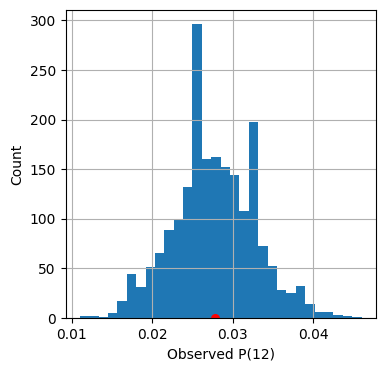

In [11]:
plt.figure(figsize=(4,4))
plt.hist(observed_P, bins=30)
plt.xlabel('Observed P(12)')
plt.ylabel('Count')
plt.scatter(1/36, 0, color='red', s=30)
plt.grid()
plt.show()

We can see that out of 2000 runs of the simulation, the observed probability of getting a total of 12 has the highest chance of being around the value where the red dot is, which is the theoretical probability.

---

## Question 3: Probability of Winning or Losing

We've seen that some of the theoretical probabilities are indeed backed by the observed probabilites in our simulations. We'll now use our knowledge of probability in an industry that relies on probability: the casinos.

The game [Craps](https://en.wikipedia.org/wiki/Craps) is supposed to be one of the casino games where the house (the casino) has the lowest edge and therefore the players have the highest odds of winning.

We'll look at the odds or probability of winning or losing the game right at the _first_ dice roll in Craps:
- If the 2 dice end up with a total of 7 or 11, then we win the game.
- If the 2 dice end up with a total of 2, 3, or 12, then we lose the game.

3a. Based on Module 5 class notes, "Finding Probabilities" section, in the Code cell below write code to **find the probability of getting a 7 or 11** in the dice roll.<br>
Then **print the probability**, rounded to 3 digits after the decimal point.

Hint to get started: to get an 11, the 2 dice can be 5 + 6 or 6 + 5. This means you need to calculate:<br>
 (P(5) and P(6)) or (P(6) and P(5))

_Make sure you write arithmetic expressions to tell the computer to do the calculations. You should not have to work out the probability ahead of time and only code: P = 0.355, for example._

In [12]:
# 3a — probability of getting 7 or 11 on the first roll
p = 1/6
P_7 = 6 * p * p
P_11 = 2 * p * p

print(f"P(7): {P_7:.3f}")
print(f"P(11): {P_11:.3f}")
print(f"P(7 or 11): {(P_7 + P_11):.3f}")



P(7): 0.167
P(11): 0.056
P(7 or 11): 0.222


3b. Similar to step 3a, in the Code cell below, write code to **find the probability of getting a 2, 3, or 12** in the first dice roll.<br>
Then **print the probability**, rounded to 3 digits after the decimal point.

In [13]:
# 3b — probability of getting 2, 3, or 12 on the first roll
p = 1/6
P_2  = 1 * p * p
P_3  = 2 * p * p
P_12 = 1 * p * p

print(f"P(2):  {P_2:.3f}")
print(f"P(3):  {P_3:.3f}")
print(f"P(12): {P_12:.3f}")
print(f"P(2 or 3 or 12): {(P_2 + P_3 + P_12):.3f}")



P(2):  0.028
P(3):  0.056
P(12): 0.028
P(2 or 3 or 12): 0.111


The good news is that during the first dice roll, our odds of losing the game is smaller than our odds of winning the game. However, our odds of winning the game in the first dice roll is quite low.